In [ ]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import pandas
pandas.__version__

# load data
dataset = loadtxt("C:\\Dev\\TSS\\xgboost_test\\pima-indians-diabetes.csv", delimiter=",")
# split data into X and y
X = dataset[:,:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print(X_test[0])

# fit model on training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train)

#model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#plot_importance(model)
#pyplot.show()


In [34]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# set common XGBoost parameters
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python

# load data
dataset = loadtxt("C:\\Dev\\TSS\\xgboost_test\\pima-indians-diabetes.csv", delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}


In [26]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sys
import os
import time
import numpy as np
import pickle as pickle
import importlib 
import pandas as pd
from sklearn import metrics

import pandas
pandas.__version__

# set common XGBoost parameters
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python

# load data
headers = ['CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
update_pd = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk_update_3.csv", sep = ',', names = headers)
    
test_pd = update_pd.fillna(0)

    
X_train, X_test, y_train, y_test = train_test_split(test_pd.iloc[:,1:172], test_pd['IS_YJ'], test_size=0.3, random_state=0)

# fit model on training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train)

#model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_predictions = model.predict(X_test)
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

acc = metrics.accuracy_score(y_test,y_predictions)
recall = metrics.recall_score(y_test,y_predictions)
f1 = metrics.f1_score(y_test,y_predictions)
precision = metrics.precision_score(y_test,y_predictions)

print("ACC: %.4f" % (acc * 100.0))

print("Precesion: %.4f" % (acc * 100.0))      
      
print("Recall: %.4f" % (recall * 100.0))
print("F1-score: %.4f" % (f1 * 100.0))it
metrics.confusion_matrix(y_test,y_predictions)

#plot_importance(model)
#pyplot.show()

Accuracy: 92.04%
ACC: 92.0429
Precesion: 92.0429
Recall: 10.4247
F1-score: 17.8512


C:\Dev\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[5695,   33],
       [ 464,   54]], dtype=int64)

In [ ]:
Accuracy: 92.04%
ACC: 92.0429
Precesion: 92.0429
Recall: 10.4247
F1-score: 17.8512

1446
1446
(array([1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368,
       1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379,
       1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401,
       1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412,
       1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423,
       1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434,
       1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445],
      dtype=int64),)
88
('AERA_351.0', 'AERA_372.0', 'B11', 'CCC_1000604.0', 'CGC_1000609.0', 'CSTC_1000003.0', 'DF_RT', 'FIC_165129.0', 'IMTC_1000005.0', 'IMTC_1000006.0', 'IND_CKH', 'IND_DWHQ', 'IRC_1000285.0', 'LSC_1000505.0', 'LST_1M_AMT', 'LST_2M_AMT', 'OGC_4.0', 'OGG_2.0', 'OGL_9.0', 'OIC_150000.0', 'SIC_154800.0', 'SIC_165100.0', 'TIC_154810.0', 'TIC_165160.0', 'TIC_165210.0', 'TIC_186110.0', '

C:\Dev\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 92.33%
ACC: 92.3311
Precesion: 92.3311
Recall: 11.5830
F1-score: 20.0334


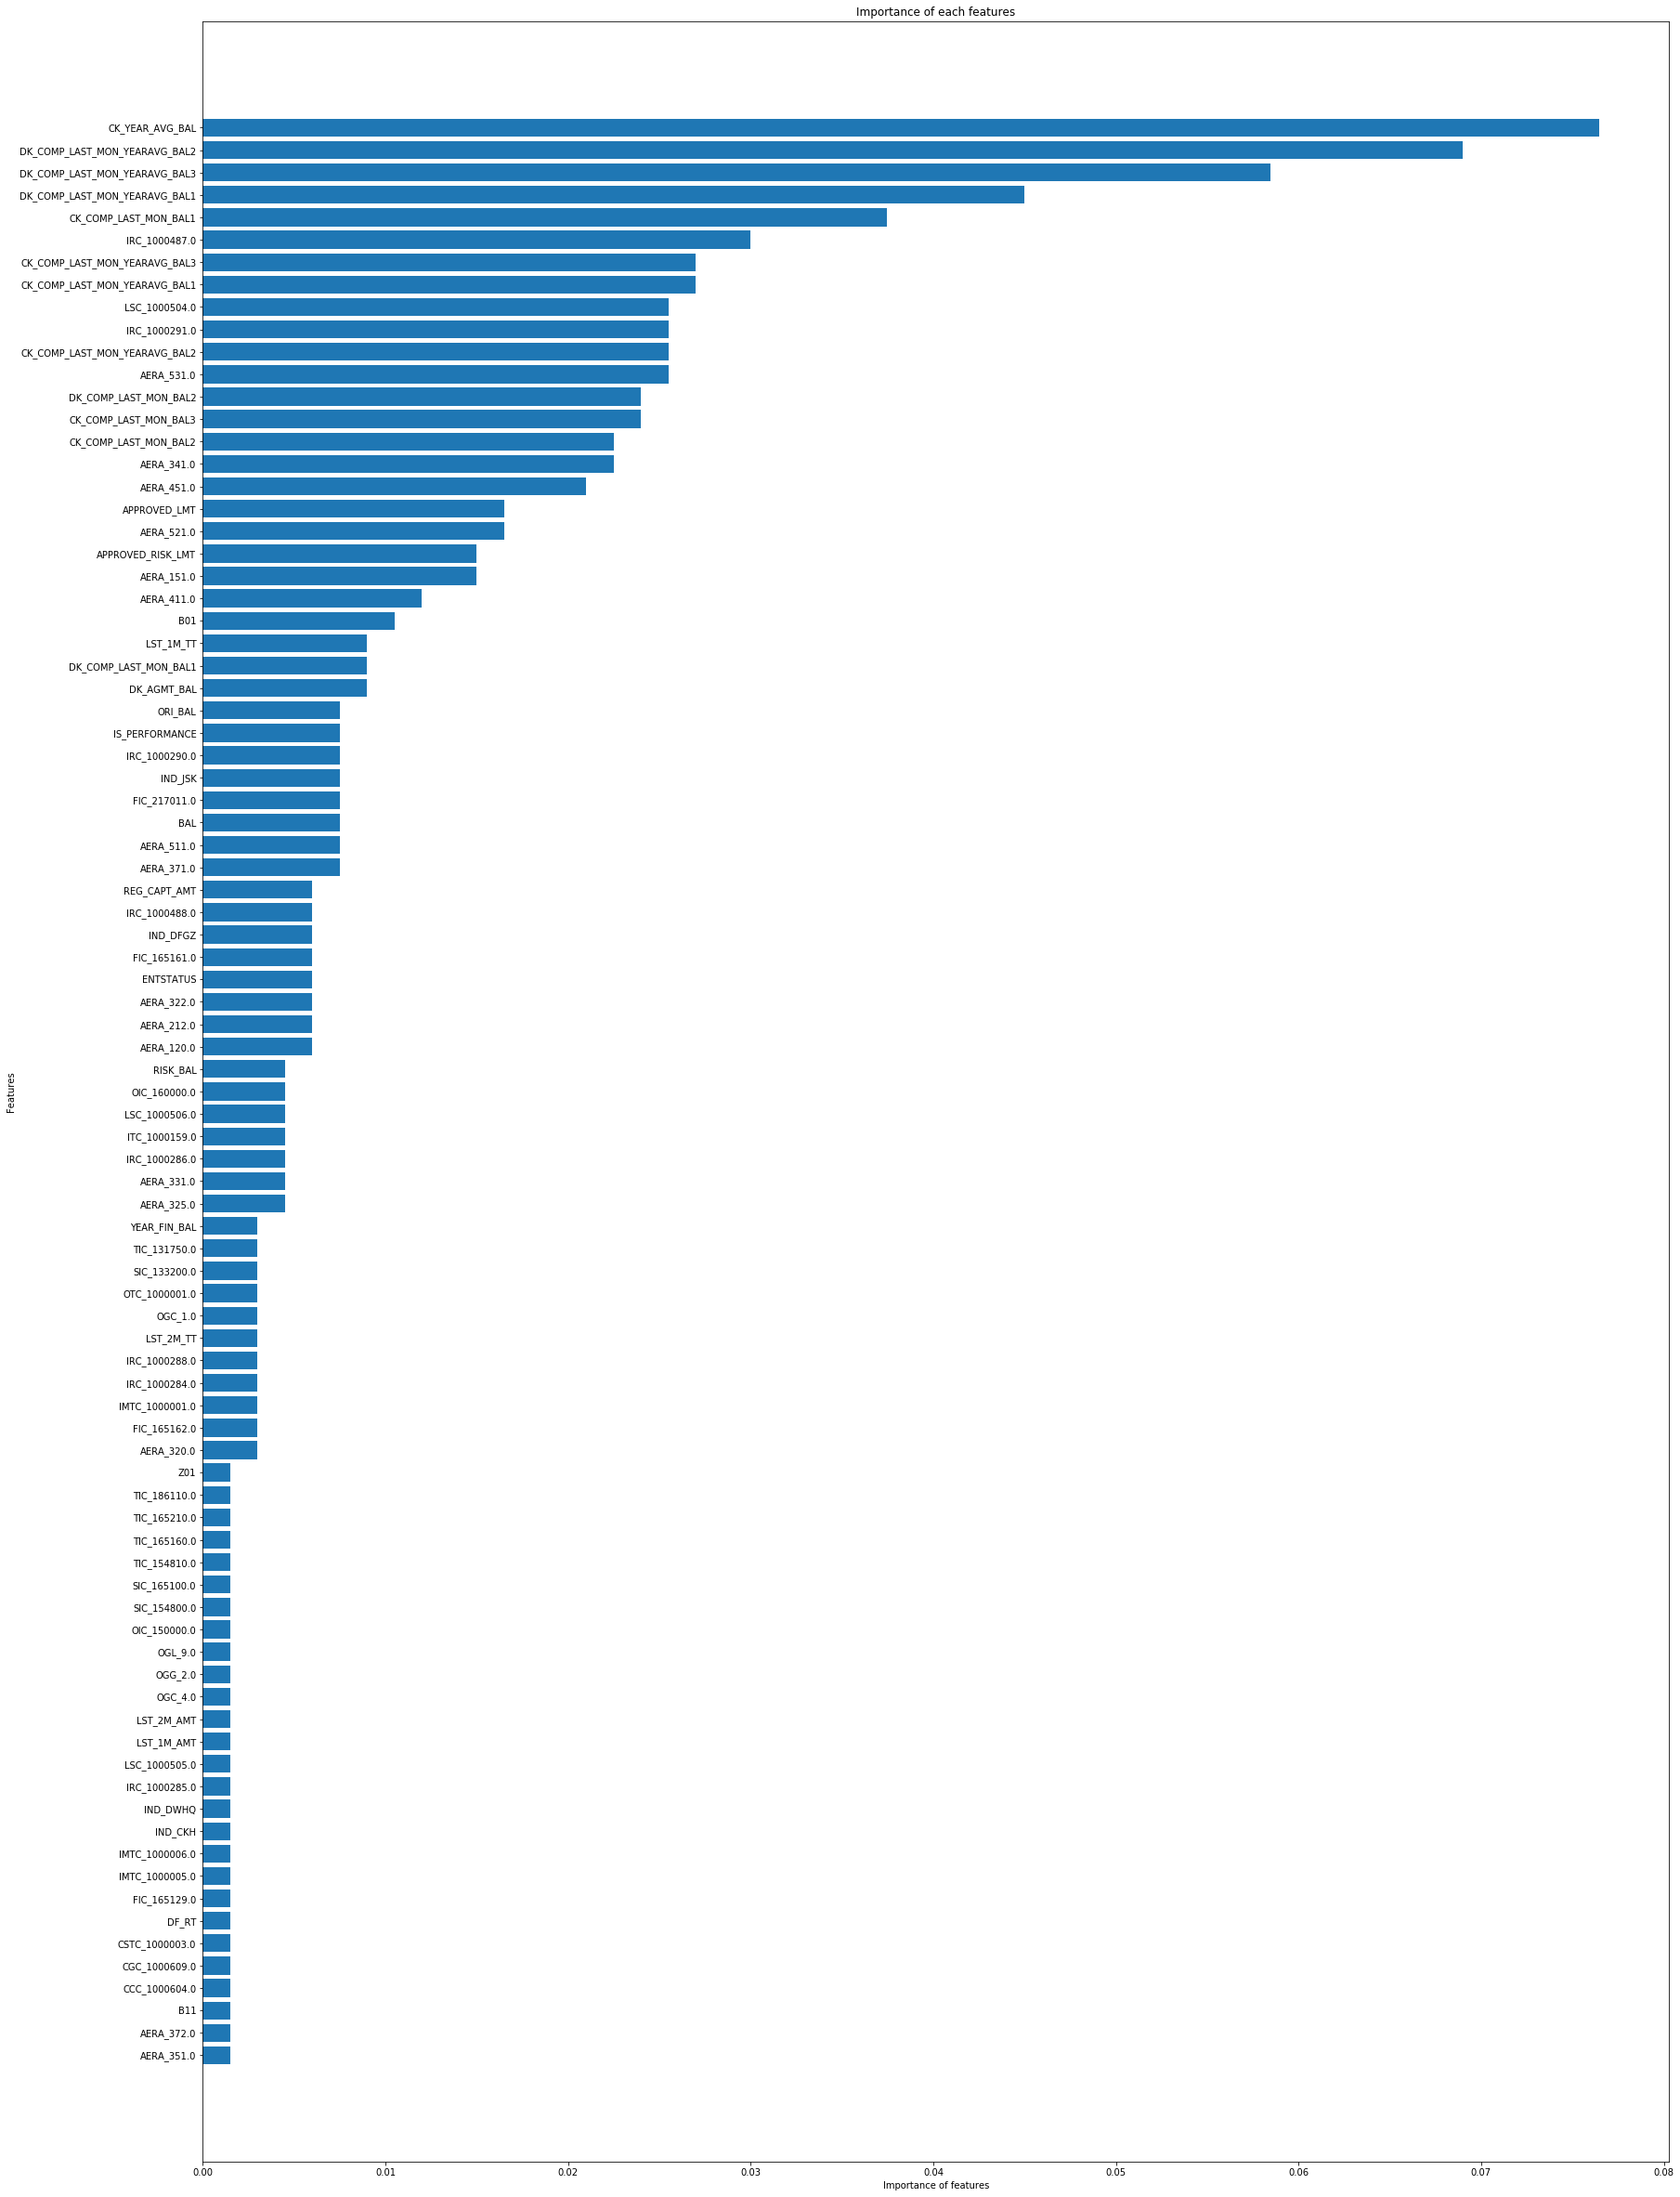

In [9]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sys
import os
import time
import numpy as np
import pickle as pickle
import importlib 
import pandas as pd
from sklearn import metrics

import pandas
pandas.__version__

# set common XGBoost parameters
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python

# load data
#headers = ['CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
headers = ['CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 
               'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL',
               'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1',
               'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ',
               'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT',
               'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH',
               'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX',
               'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC',
               'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK',
               'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ',
               'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
               'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03',
               'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04',
               'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'BAS_AC_IS_BOCOM',
               'STRATEGIC_CUST', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS',
               'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IRC_1000281.0',
               'IRC_1000282.0', 'IRC_1000283.0', 'IRC_1000284.0', 'IRC_1000285.0', 'IRC_1000286.0', 'IRC_1000287.0', 'IRC_1000288.0',
               'IRC_1000289.0', 'IRC_1000290.0', 'IRC_1000291.0', 'IRC_1000292.0', 'IRC_1000487.0', 'IRC_1000488.0', 'IRC_1000489.0',
               'IRC_1000490.0', 'OIC_110000.0', 'OIC_120000.0', 'OIC_130000.0', 'OIC_140000.0', 'OIC_150000.0', 'OIC_160000.0',
               'OIC_170000.0', 'OIC_180000.0', 'OIC_190000.0', 'OIC_200000.0', 'OIC_210000.0', 'OIC_220000.0', 'OIC_230000.0',
               'OIC_240000.0', 'OIC_250000.0', 'OIC_260000.0', 'OIC_270000.0', 'OIC_280000.0', 'OIC_290000.0', 'OIC_360000.0',
               'SIC_110100.0', 'SIC_110200.0', 'SIC_110300.0', 'SIC_110400.0', 'SIC_110500.0', 'SIC_120600.0', 'SIC_120700.0',
               'SIC_120800.0', 'SIC_120900.0', 'SIC_121000.0', 'SIC_121100.0', 'SIC_121200.0', 'SIC_131300.0', 'SIC_131400.0',
               'SIC_131500.0', 'SIC_131600.0', 'SIC_131700.0', 'SIC_131800.0', 'SIC_131900.0', 'SIC_132000.0', 'SIC_132100.0',
               'SIC_132200.0', 'SIC_132300.0', 'SIC_132400.0', 'SIC_132500.0', 'SIC_132600.0', 'SIC_132700.0', 'SIC_132800.0',
               'SIC_132900.0', 'SIC_133000.0', 'SIC_133100.0', 'SIC_133200.0', 'SIC_133300.0', 'SIC_133400.0', 'SIC_133500.0',
               'SIC_133600.0', 'SIC_133700.0', 'SIC_133800.0', 'SIC_133900.0', 'SIC_134000.0', 'SIC_134100.0', 'SIC_134200.0',
               'SIC_134300.0', 'SIC_144400.0', 'SIC_144500.0', 'SIC_144600.0', 'SIC_154700.0', 'SIC_154800.0', 'SIC_154900.0',
               'SIC_155000.0', 'SIC_165100.0', 'SIC_165200.0', 'SIC_175300.0', 'SIC_175400.0', 'SIC_175500.0', 'SIC_175600.0',
               'SIC_175800.0', 'SIC_175900.0', 'SIC_186100.0', 'SIC_186200.0', 'SIC_196300.0', 'SIC_196400.0', 'SIC_196500.0',
               'SIC_206600.0', 'SIC_206800.0', 'SIC_206900.0', 'SIC_217000.0', 'SIC_227100.0', 'SIC_227200.0', 'SIC_227300.0',
               'SIC_237300.0', 'SIC_237400.0', 'SIC_237500.0', 'SIC_247600.0', 'SIC_247700.0', 'SIC_247800.0', 'SIC_257900.0',
               'SIC_258000.0', 'SIC_258100.0', 'SIC_268200.0', 'SIC_278300.0', 'SIC_278400.0', 'SIC_288500.0', 'SIC_288600.0',
               'SIC_288700.0', 'SIC_288800.0', 'SIC_288900.0', 'SIC_299100.0', 'SIC_299300.0', 'SIC_299400.0', 'SIC_360000.0',
               'TIC_110110.0', 'TIC_110130.0', 'TIC_110140.0', 'TIC_110150.0', 'TIC_110160.0', 'TIC_110190.0', 'TIC_110210.0',
               'TIC_110220.0', 'TIC_110230.0', 'TIC_110240.0', 'TIC_110250.0', 'TIC_110310.0', 'TIC_110320.0', 'TIC_110390.0',
               'TIC_110410.0', 'TIC_110420.0', 'TIC_110510.0', 'TIC_110520.0', 'TIC_110530.0', 'TIC_110540.0', 'TIC_120610.0',
               'TIC_120690.0', 'TIC_120710.0', 'TIC_120720.0', 'TIC_120810.0', 'TIC_120910.0', 'TIC_120920.0', 'TIC_120930.0',
               'TIC_121010.0', 'TIC_121030.0', 'TIC_121120.0', 'TIC_121190.0', 'TIC_121210.0', 'TIC_131310.0', 'TIC_131320.0',
               'TIC_131330.0', 'TIC_131340.0', 'TIC_131350.0', 'TIC_131360.0', 'TIC_131370.0', 'TIC_131390.0', 'TIC_131410.0',
               'TIC_131420.0', 'TIC_131430.0', 'TIC_131440.0', 'TIC_131450.0', 'TIC_131460.0', 'TIC_131490.0', 'TIC_131510.0',
               'TIC_131520.0', 'TIC_131530.0', 'TIC_131620.0', 'TIC_131690.0', 'TIC_131710.0', 'TIC_131720.0', 'TIC_131730.0',
               'TIC_131740.0', 'TIC_131750.0', 'TIC_131760.0', 'TIC_131770.0', 'TIC_131780.0', 'TIC_131810.0', 'TIC_131820.0',
               'TIC_131830.0', 'TIC_131910.0', 'TIC_131920.0', 'TIC_131940.0', 'TIC_131950.0', 'TIC_132010.0', 'TIC_132020.0',
               'TIC_132030.0', 'TIC_132040.0', 'TIC_132110.0', 'TIC_132120.0', 'TIC_132130.0', 'TIC_132140.0', 'TIC_132190.0',
               'TIC_132220.0', 'TIC_132230.0', 'TIC_132310.0', 'TIC_132320.0', 'TIC_132410.0', 'TIC_132430.0', 'TIC_132440.0',
               'TIC_132450.0', 'TIC_132460.0', 'TIC_132510.0', 'TIC_132520.0', 'TIC_132610.0', 'TIC_132620.0', 'TIC_132630.0',
               'TIC_132640.0', 'TIC_132650.0', 'TIC_132660.0', 'TIC_132670.0', 'TIC_132680.0', 'TIC_132710.0', 'TIC_132720.0',
               'TIC_132730.0', 'TIC_132740.0', 'TIC_132750.0', 'TIC_132760.0', 'TIC_132770.0', 'TIC_132810.0', 'TIC_132820.0',
               'TIC_132910.0', 'TIC_132920.0', 'TIC_133010.0', 'TIC_133020.0', 'TIC_133030.0', 'TIC_133040.0', 'TIC_133050.0',
               'TIC_133060.0', 'TIC_133070.0', 'TIC_133080.0', 'TIC_133090.0', 'TIC_133120.0', 'TIC_133130.0', 'TIC_133140.0',
               'TIC_133150.0', 'TIC_133210.0', 'TIC_133220.0', 'TIC_133230.0', 'TIC_133240.0', 'TIC_133260.0', 'TIC_133310.0',
               'TIC_133320.0', 'TIC_133330.0', 'TIC_133340.0', 'TIC_133350.0', 'TIC_133360.0', 'TIC_133370.0', 'TIC_133380.0',
               'TIC_133390.0', 'TIC_133410.0', 'TIC_133420.0', 'TIC_133430.0', 'TIC_133440.0', 'TIC_133450.0', 'TIC_133460.0',
               'TIC_133470.0', 'TIC_133480.0', 'TIC_133490.0', 'TIC_133510.0', 'TIC_133520.0', 'TIC_133530.0', 'TIC_133540.0',
               'TIC_133550.0', 'TIC_133560.0', 'TIC_133570.0', 'TIC_133580.0', 'TIC_133590.0', 'TIC_133610.0', 'TIC_133620.0', 
               'TIC_133650.0', 'TIC_133660.0', 'TIC_133710.0', 'TIC_133720.0', 'TIC_133730.0', 'TIC_133740.0', 'TIC_133750.0',
               'TIC_133760.0', 'TIC_133790.0', 'TIC_133810.0', 'TIC_133820.0', 'TIC_133830.0', 'TIC_133840.0', 'TIC_133850.0',
               'TIC_133860.0', 'TIC_133870.0', 'TIC_133890.0', 'TIC_133910.0', 'TIC_133920.0', 'TIC_133930.0', 'TIC_133950.0',
               'TIC_133960.0', 'TIC_133970.0', 'TIC_133990.0', 'TIC_134010.0', 'TIC_134020.0', 'TIC_134030.0', 'TIC_134040.0',
               'TIC_134090.0', 'TIC_134110.0', 'TIC_134190.0', 'TIC_134210.0', 'TIC_134220.0', 'TIC_134310.0', 'TIC_134340.0',
               'TIC_134390.0', 'TIC_144410.0', 'TIC_144420.0', 'TIC_144430.0', 'TIC_144510.0', 'TIC_144610.0', 'TIC_144620.0',
               'TIC_144690.0', 'TIC_154710.0', 'TIC_154810.0', 'TIC_154820.0', 'TIC_154840.0', 'TIC_154890.0', 'TIC_154910.0',
               'TIC_154920.0', 'TIC_154990.0', 'TIC_155010.0', 'TIC_155020.0', 'TIC_155030.0', 'TIC_155090.0', 'TIC_165110.0',
               'TIC_165120.0', 'TIC_165130.0', 'TIC_165140.0', 'TIC_165150.0', 'TIC_165160.0', 'TIC_165170.0', 'TIC_165180.0',
               'TIC_165190.0', 'TIC_165210.0', 'TIC_165220.0', 'TIC_165230.0', 'TIC_165240.0', 'TIC_165250.0', 'TIC_165260.0',
               'TIC_165270.0', 'TIC_165280.0', 'TIC_165290.0', 'TIC_175310.0', 'TIC_175320.0', 'TIC_175410.0', 'TIC_175420.0',
               'TIC_175430.0', 'TIC_175440.0', 'TIC_175510.0', 'TIC_175520.0', 'TIC_175530.0', 'TIC_175610.0', 'TIC_175620.0',
               'TIC_175630.0', 'TIC_175810.0', 'TIC_175820.0', 'TIC_175910.0', 'TIC_175990.0', 'TIC_186110.0', 'TIC_186120.0',
               'TIC_186190.0', 'TIC_186210.0', 'TIC_186220.0', 'TIC_186230.0', 'TIC_186290.0', 'TIC_196310.0', 'TIC_196320.0',
               'TIC_196410.0', 'TIC_196420.0', 'TIC_196490.0', 'TIC_196510.0', 'TIC_196520.0', 'TIC_196530.0', 'TIC_196540.0',
               'TIC_196590.0', 'TIC_206630.0', 'TIC_206850.0', 'TIC_206990.0', 'TIC_217010.0', 'TIC_217020.0', 'TIC_217040.0',
               'TIC_217090.0', 'TIC_227110.0', 'TIC_227210.0', 'TIC_227230.0', 'TIC_227240.0', 'TIC_227260.0', 'TIC_227270.0',
               'TIC_227280.0', 'TIC_227290.0', 'TIC_227310.0', 'TIC_237310.0', 'TIC_237320.0', 'TIC_237340.0', 'TIC_237440.0',
               'TIC_237450.0', 'TIC_237460.0', 'TIC_237470.0', 'TIC_237480.0', 'TIC_237490.0', 'TIC_237510.0', 'TIC_237520.0',
               'TIC_237590.0', 'TIC_247690.0', 'TIC_247710.0', 'TIC_247720.0', 'TIC_247810.0', 'TIC_247820.0', 'TIC_247830.0',
               'TIC_247840.0', 'TIC_247850.0', 'TIC_257910.0', 'TIC_257960.0', 'TIC_257970.0', 'TIC_257980.0', 'TIC_257990.0',
               'TIC_258010.0', 'TIC_258110.0', 'TIC_258190.0', 'TIC_268210.0', 'TIC_268220.0', 'TIC_268230.0', 'TIC_268240.0',
               'TIC_268290.0', 'TIC_278310.0', 'TIC_278320.0', 'TIC_278350.0', 'TIC_278390.0', 'TIC_278410.0', 'TIC_288510.0',
               'TIC_288520.0', 'TIC_288610.0', 'TIC_288620.0', 'TIC_288630.0', 'TIC_288650.0', 'TIC_288720.0', 'TIC_288740.0',
               'TIC_288790.0', 'TIC_288890.0', 'TIC_288910.0', 'TIC_288920.0', 'TIC_288940.0', 'TIC_288990.0', 'TIC_299190.0',
               'TIC_299310.0', 'TIC_299440.0', 'TIC_360000.0', 'TIC_2170110.0', 'FIC_110111.0', 'FIC_110112.0', 'FIC_110113.0',
               'FIC_110119.0', 'FIC_110131.0', 'FIC_110134.0', 'FIC_110141.0', 'FIC_110142.0', 'FIC_110143.0', 'FIC_110149.0',
               'FIC_110152.0', 'FIC_110153.0', 'FIC_110154.0', 'FIC_110159.0', 'FIC_110163.0', 'FIC_110169.0', 'FIC_110191.0',
               'FIC_110211.0', 'FIC_110212.0', 'FIC_110221.0', 'FIC_110231.0', 'FIC_110241.0', 'FIC_110251.0', 'FIC_110252.0',
               'FIC_110311.0', 'FIC_110313.0', 'FIC_110314.0', 'FIC_110319.0', 'FIC_110321.0', 'FIC_110322.0', 'FIC_110391.0',
               'FIC_110411.0', 'FIC_110412.0', 'FIC_110421.0', 'FIC_110511.0', 'FIC_110513.0', 'FIC_110519.0', 'FIC_110521.0',
               'FIC_110523.0', 'FIC_110529.0', 'FIC_110531.0', 'FIC_110541.0', 'FIC_120610.0', 'FIC_120611.0', 'FIC_120691.0',
               'FIC_120711.0', 'FIC_120721.0', 'FIC_120811.0', 'FIC_120911.0', 'FIC_120912.0', 'FIC_120914.0', 'FIC_120919.0',
               'FIC_120921.0', 'FIC_120931.0', 'FIC_120932.0', 'FIC_120939.0', 'FIC_121011.0', 'FIC_121012.0', 'FIC_121019.0',
               'FIC_121031.0', 'FIC_121121.0', 'FIC_121191.0', 'FIC_121211.0', 'FIC_131311.0', 'FIC_131321.0', 'FIC_131331.0',
               'FIC_131341.0', 'FIC_131351.0', 'FIC_131352.0', 'FIC_131353.0', 'FIC_131361.0', 'FIC_131369.0', 'FIC_131371.0',
               'FIC_131372.0', 'FIC_131391.0', 'FIC_131399.0', 'FIC_131411.0', 'FIC_131419.0', 'FIC_131421.0', 'FIC_131422.0',
               'FIC_131432.0', 'FIC_131439.0', 'FIC_131441.0', 'FIC_131453.0', 'FIC_131462.0', 'FIC_131469.0', 'FIC_131491.0',
               'FIC_131492.0', 'FIC_131495.0', 'FIC_131499.0', 'FIC_131512.0', 'FIC_131513.0', 'FIC_131515.0', 'FIC_131522.0',
               'FIC_131523.0', 'FIC_131524.0', 'FIC_131529.0', 'FIC_131531.0', 'FIC_131621.0', 'FIC_131691.0', 'FIC_131711.0',
               'FIC_131712.0', 'FIC_131713.0', 'FIC_131722.0', 'FIC_131723.0', 'FIC_131731.0', 'FIC_131741.0', 'FIC_131742.0',
               'FIC_131743.0', 'FIC_131751.0', 'FIC_131752.0', 'FIC_131761.0', 'FIC_131763.0', 'FIC_131771.0', 'FIC_131772.0',
               'FIC_131773.0', 'FIC_131779.0', 'FIC_131789.0', 'FIC_131811.0', 'FIC_131821.0', 'FIC_131831.0', 'FIC_131911.0',
               'FIC_131922.0', 'FIC_131929.0', 'FIC_131941.0', 'FIC_131942.0', 'FIC_131951.0', 'FIC_131952.0', 'FIC_131954.0', 
               'FIC_131959.0', 'FIC_132011.0', 'FIC_132019.0', 'FIC_132021.0', 'FIC_132022.0', 'FIC_132023.0', 'FIC_132029.0',
               'FIC_132032.0', 'FIC_132033.0', 'FIC_132034.0', 'FIC_132041.0', 'FIC_132111.0', 'FIC_132121.0', 'FIC_132131.0',
               'FIC_132141.0', 'FIC_132191.0', 'FIC_132221.0', 'FIC_132223.0', 'FIC_132231.0', 'FIC_132239.0', 'FIC_132311.0',
               'FIC_132312.0', 'FIC_132319.0', 'FIC_132321.0', 'FIC_132411.0', 'FIC_132412.0', 'FIC_132419.0', 'FIC_132432.0',
               'FIC_132435.0', 'FIC_132439.0', 'FIC_132442.0', 'FIC_132443.0', 'FIC_132449.0', 'FIC_132451.0', 'FIC_132461.0',
               'FIC_132511.0', 'FIC_132520.0', 'FIC_132521.0', 'FIC_132611.0', 'FIC_132612.0', 'FIC_132613.0', 'FIC_132614.0',
               'FIC_132619.0', 'FIC_132621.0', 'FIC_132622.0', 'FIC_132624.0', 'FIC_132625.0', 'FIC_132631.0', 'FIC_132641.0',
               'FIC_132643.0', 'FIC_132644.0', 'FIC_132645.0', 'FIC_132650.0', 'FIC_132651.0', 'FIC_132652.0', 'FIC_132653.0',
               'FIC_132659.0', 'FIC_132661.0', 'FIC_132662.0', 'FIC_132663.0', 'FIC_132665.0', 'FIC_132669.0', 'FIC_132671.0',
               'FIC_132681.0', 'FIC_132682.0', 'FIC_132689.0', 'FIC_132711.0', 'FIC_132721.0', 'FIC_132731.0', 'FIC_132741.0',
               'FIC_132751.0', 'FIC_132761.0', 'FIC_132771.0', 'FIC_132812.0', 'FIC_132822.0', 'FIC_132826.0', 'FIC_132829.0',
               'FIC_132911.0', 'FIC_132912.0', 'FIC_132913.0', 'FIC_132915.0', 'FIC_132919.0', 'FIC_132921.0', 'FIC_132922.0',
               'FIC_132923.0', 'FIC_132924.0', 'FIC_132925.0', 'FIC_132926.0', 'FIC_132927.0', 'FIC_132928.0', 'FIC_132929.0',
               'FIC_133011.0', 'FIC_133012.0', 'FIC_133021.0', 'FIC_133022.0', 'FIC_133024.0', 'FIC_133029.0', 'FIC_133031.0',
               'FIC_133032.0', 'FIC_133033.0', 'FIC_133034.0', 'FIC_133035.0', 'FIC_133039.0', 'FIC_133041.0', 'FIC_133049.0',
               'FIC_133051.0', 'FIC_133052.0', 'FIC_133054.0', 'FIC_133055.0', 'FIC_133056.0', 'FIC_133059.0', 'FIC_133061.0',
               'FIC_133071.0', 'FIC_133072.0', 'FIC_133073.0', 'FIC_133079.0', 'FIC_133089.0', 'FIC_133091.0', 'FIC_133099.0',
               'FIC_133121.0', 'FIC_133131.0', 'FIC_133141.0', 'FIC_133151.0', 'FIC_133211.0', 'FIC_133212.0', 'FIC_133213.0',
               'FIC_133216.0', 'FIC_133217.0', 'FIC_133219.0', 'FIC_133221.0', 'FIC_133231.0', 'FIC_133239.0', 'FIC_133240.0',
               'FIC_133241.0', 'FIC_133260.0', 'FIC_133261.0', 'FIC_133262.0', 'FIC_133264.0', 'FIC_133269.0', 'FIC_133311.0',
               'FIC_133312.0', 'FIC_133321.0', 'FIC_133322.0', 'FIC_133329.0', 'FIC_133331.0', 'FIC_133332.0', 'FIC_133333.0',
               'FIC_133341.0', 'FIC_133351.0', 'FIC_133352.0', 'FIC_133353.0', 'FIC_133359.0', 'FIC_133361.0', 'FIC_133371.0',
               'FIC_133381.0', 'FIC_133382.0', 'FIC_133383.0', 'FIC_133389.0', 'FIC_133391.0', 'FIC_133392.0', 'FIC_133399.0', 
               'FIC_133411.0', 'FIC_133413.0', 'FIC_133415.0', 'FIC_133419.0', 'FIC_133421.0', 'FIC_133422.0', 'FIC_133423.0',
               'FIC_133424.0', 'FIC_133425.0', 'FIC_133429.0', 'FIC_133431.0', 'FIC_133432.0', 'FIC_133433.0', 'FIC_133434.0',
               'FIC_133435.0', 'FIC_133439.0', 'FIC_133441.0', 'FIC_133442.0', 'FIC_133443.0', 'FIC_133444.0', 'FIC_133451.0',
               'FIC_133452.0', 'FIC_133459.0', 'FIC_133462.0', 'FIC_133464.0', 'FIC_133465.0', 'FIC_133468.0', 'FIC_133472.0',
               'FIC_133481.0', 'FIC_133482.0', 'FIC_133483.0', 'FIC_133484.0', 'FIC_133489.0', 'FIC_133491.0', 'FIC_133511.0',
               'FIC_133512.0', 'FIC_133513.0', 'FIC_133514.0', 'FIC_133515.0', 'FIC_133516.0', 'FIC_133521.0', 'FIC_133525.0',
               'FIC_133529.0', 'FIC_133531.0', 'FIC_133533.0', 'FIC_133534.0', 'FIC_133541.0', 'FIC_133542.0', 'FIC_133544.0',
               'FIC_133545.0', 'FIC_133546.0', 'FIC_133551.0', 'FIC_133553.0', 'FIC_133561.0', 'FIC_133562.0', 'FIC_133571.0',
               'FIC_133572.0', 'FIC_133574.0', 'FIC_133576.0', 'FIC_133579.0', 'FIC_133580.0', 'FIC_133581.0', 'FIC_133589.0',
               'FIC_133591.0', 'FIC_133595.0', 'FIC_133596.0', 'FIC_133597.0', 'FIC_133599.0', 'FIC_133611.0', 'FIC_133621.0',
               'FIC_133651.0', 'FIC_133660.0', 'FIC_133661.0', 'FIC_133713.0', 'FIC_133714.0', 'FIC_133719.0', 'FIC_133721.0',
               'FIC_133731.0', 'FIC_133741.0', 'FIC_133743.0', 'FIC_133751.0', 'FIC_133752.0', 'FIC_133761.0', 'FIC_133762.0',
               'FIC_133799.0', 'FIC_133811.0', 'FIC_133812.0', 'FIC_133819.0', 'FIC_133821.0', 'FIC_133823.0', 'FIC_133824.0',
               'FIC_133825.0', 'FIC_133829.0', 'FIC_133831.0', 'FIC_133832.0', 'FIC_133833.0', 'FIC_133839.0', 'FIC_133841.0',
               'FIC_133842.0', 'FIC_133849.0', 'FIC_133851.0', 'FIC_133854.0', 'FIC_133855.0', 'FIC_133856.0', 'FIC_133857.0',
               'FIC_133859.0', 'FIC_133861.0', 'FIC_133871.0', 'FIC_133872.0', 'FIC_133879.0', 'FIC_133891.0', 'FIC_133899.0',
               'FIC_133919.0', 'FIC_133921.0', 'FIC_133922.0', 'FIC_133939.0', 'FIC_133951.0', 'FIC_133952.0', 'FIC_133961.0',
               'FIC_133962.0', 'FIC_133963.0', 'FIC_133969.0', 'FIC_133970.0', 'FIC_133971.0', 'FIC_133972.0', 'FIC_133991.0',
               'FIC_134011.0', 'FIC_134012.0', 'FIC_134014.0', 'FIC_134019.0', 'FIC_134025.0', 'FIC_134028.0', 'FIC_134031.0',
               'FIC_134041.0', 'FIC_134091.0', 'FIC_134119.0', 'FIC_134191.0', 'FIC_134211.0', 'FIC_134221.0', 'FIC_134311.0',
               'FIC_134342.0', 'FIC_134391.0', 'FIC_144411.0', 'FIC_144412.0', 'FIC_144414.0', 'FIC_144415.0', 'FIC_144419.0',
               'FIC_144421.0', 'FIC_144431.0', 'FIC_144511.0', 'FIC_144611.0', 'FIC_144621.0', 'FIC_144691.0', 'FIC_154710.0',
               'FIC_154711.0', 'FIC_154811.0', 'FIC_154812.0', 'FIC_154813.0', 'FIC_154819.0', 'FIC_154820.0', 'FIC_154821.0',
               'FIC_154822.0', 'FIC_154823.0', 'FIC_154841.0', 'FIC_154891.0', 'FIC_154911.0', 'FIC_154921.0', 'FIC_154991.0',
               'FIC_155011.0', 'FIC_155029.0', 'FIC_155031.0', 'FIC_155091.0', 'FIC_165111.0', 'FIC_165112.0', 'FIC_165113.0',
               'FIC_165114.0', 'FIC_165115.0', 'FIC_165119.0', 'FIC_165121.0', 'FIC_165122.0', 'FIC_165123.0', 'FIC_165124.0',
               'FIC_165125.0', 'FIC_165126.0', 'FIC_165127.0', 'FIC_165129.0', 'FIC_165131.0', 'FIC_165132.0', 'FIC_165133.0',
               'FIC_165134.0', 'FIC_165135.0', 'FIC_165137.0', 'FIC_165139.0', 'FIC_165141.0', 'FIC_165142.0', 'FIC_165146.0',
               'FIC_165149.0', 'FIC_165150.0', 'FIC_165151.0', 'FIC_165152.0', 'FIC_165153.0', 'FIC_165161.0', 'FIC_165162.0',
               'FIC_165163.0', 'FIC_165164.0', 'FIC_165165.0', 'FIC_165166.0', 'FIC_165169.0', 'FIC_165170.0', 'FIC_165171.0',
               'FIC_165172.0', 'FIC_165173.0', 'FIC_165174.0', 'FIC_165175.0', 'FIC_165176.0', 'FIC_165177.0', 'FIC_165178.0',
               'FIC_165179.0', 'FIC_165181.0', 'FIC_165189.0', 'FIC_165190.0', 'FIC_165191.0', 'FIC_165199.0', 'FIC_165211.0',
               'FIC_165212.0', 'FIC_165219.0', 'FIC_165221.0', 'FIC_165223.0', 'FIC_165224.0', 'FIC_165226.0', 'FIC_165227.0',
               'FIC_165229.0', 'FIC_165231.0', 'FIC_165232.0', 'FIC_165233.0', 'FIC_165238.0', 'FIC_165243.0', 'FIC_165245.0',
               'FIC_165246.0', 'FIC_165248.0', 'FIC_165251.0', 'FIC_165252.0', 'FIC_165261.0', 'FIC_165262.0', 'FIC_165263.0',
               'FIC_165264.0', 'FIC_165271.0', 'FIC_165272.0', 'FIC_165273.0', 'FIC_165274.0', 'FIC_165279.0', 'FIC_165281.0',
               'FIC_165282.0', 'FIC_165283.0', 'FIC_165285.0', 'FIC_165286.0', 'FIC_165287.0', 'FIC_165289.0', 'FIC_165299.0',
               'FIC_175311.0', 'FIC_175321.0', 'FIC_175411.0', 'FIC_175412.0', 'FIC_175413.0', 'FIC_175419.0', 'FIC_175421.0',
               'FIC_175431.0', 'FIC_175442.0', 'FIC_175449.0', 'FIC_175512.0', 'FIC_175513.0', 'FIC_175521.0', 'FIC_175522.0',
               'FIC_175523.0', 'FIC_175532.0', 'FIC_175611.0', 'FIC_175612.0', 'FIC_175621.0', 'FIC_175631.0', 'FIC_175811.0',
               'FIC_175821.0', 'FIC_175829.0', 'FIC_175911.0', 'FIC_175919.0', 'FIC_175990.0', 'FIC_175991.0', 'FIC_186111.0',
               'FIC_186121.0', 'FIC_186191.0', 'FIC_186211.0', 'FIC_186221.0', 'FIC_186232.0', 'FIC_186292.0', 'FIC_186299.0',
               'FIC_196310.0', 'FIC_196311.0', 'FIC_196312.0', 'FIC_196319.0', 'FIC_196321.0', 'FIC_196411.0', 'FIC_196421.0',
               'FIC_196491.0', 'FIC_196511.0', 'FIC_196521.0', 'FIC_196531.0', 'FIC_196541.0', 'FIC_196599.0', 'FIC_206639.0',
               'FIC_206851.0', 'FIC_206991.0', 'FIC_217010.0', 'FIC_217011.0', 'FIC_217021.0', 'FIC_217041.0', 'FIC_217091.0', 
               'FIC_227111.0', 'FIC_227113.0', 'FIC_227119.0', 'FIC_227211.0', 'FIC_227212.0', 'FIC_227219.0', 'FIC_227231.0',
               'FIC_227239.0', 'FIC_227240.0', 'FIC_227241.0', 'FIC_227263.0', 'FIC_227269.0', 'FIC_227271.0', 'FIC_227272.0',
               'FIC_227282.0', 'FIC_227289.0', 'FIC_227291.0', 'FIC_227292.0', 'FIC_227293.0', 'FIC_227294.0', 'FIC_227299.0',
               'FIC_227311.0', 'FIC_227312.0', 'FIC_227313.0', 'FIC_237311.0', 'FIC_237321.0', 'FIC_237341.0', 'FIC_237441.0',
               'FIC_237451.0', 'FIC_237461.0', 'FIC_237471.0', 'FIC_237474.0', 'FIC_237475.0', 'FIC_237481.0', 'FIC_237482.0', 
               'FIC_237491.0', 'FIC_237499.0', 'FIC_237510.0', 'FIC_237512.0', 'FIC_237514.0', 'FIC_237519.0', 'FIC_237521.0',
               'FIC_237591.0', 'FIC_247691.0', 'FIC_247711.0', 'FIC_247719.0', 'FIC_247721.0', 'FIC_247722.0', 'FIC_247723.0',
               'FIC_247729.0', 'FIC_247811.0', 'FIC_247821.0', 'FIC_247831.0', 'FIC_247841.0', 'FIC_247852.0', 'FIC_257911.0',
               'FIC_257961.0', 'FIC_257971.0', 'FIC_257981.0', 'FIC_257991.0', 'FIC_258011.0', 'FIC_258119.0', 'FIC_258191.0',
               'FIC_268211.0', 'FIC_268220.0', 'FIC_268231.0', 'FIC_268234.0', 'FIC_268236.0', 'FIC_268241.0', 'FIC_268242.0',
               'FIC_268291.0', 'FIC_268299.0', 'FIC_278311.0', 'FIC_278312.0', 'FIC_278313.0', 'FIC_278315.0', 'FIC_278323.0',
               'FIC_278351.0', 'FIC_278391.0', 'FIC_278414.0', 'FIC_288511.0', 'FIC_288521.0', 'FIC_288522.0', 'FIC_288611.0',
               'FIC_288621.0', 'FIC_288631.0', 'FIC_288651.0', 'FIC_288721.0', 'FIC_288741.0', 'FIC_288791.0', 'FIC_288891.0',
               'FIC_288911.0', 'FIC_288921.0', 'FIC_288949.0', 'FIC_288991.0', 'FIC_299191.0', 'FIC_299311.0', 'FIC_299441.0',
               'FIC_360000.0', 'FIC_2170111.0', 'CSTC_1000001.0', 'CSTC_1000002.0', 'CSTC_1000003.0', 'CSTC_1000004.0', 'OTC_1000001.0',
               'OTC_1000002.0', 'OTC_1000005.0', 'OTC_1000015.0', 'OTC_1000016.0', 'OTC_1000022.0', 'OTC_1000031.0', 'OTC_1000032.0',
               'OTC_1000034.0', 'OTC_1000036.0', 'ITC_1000100.0', 'ITC_1000110.0', 'ITC_1000120.0', 'ITC_1000130.0', 'ITC_1000140.0',
               'ITC_1000141.0', 'ITC_1000142.0', 'ITC_1000143.0', 'ITC_1000149.0', 'ITC_1000150.0', 'ITC_1000159.0', 'ITC_1000160.0',
               'ITC_1000170.0', 'ITC_1000171.0', 'ITC_1000172.0', 'ITC_1000173.0', 'ITC_1000174.0', 'ITC_1000175.0', 'ITC_1000179.0',
               'ITC_1000190.0', 'ITC_1000200.0', 'ITC_1000210.0', 'ITC_1000220.0', 'ITC_1000230.0', 'ITC_1000240.0', 'ITC_1000300.0',
               'ITC_1000310.0', 'ITC_1000320.0', 'ITC_1000330.0', 'ITC_1000340.0', 'ITC_1000500.0', 'IMTC_0.0', 'IMTC_1000001.0',
               'IMTC_1000002.0', 'IMTC_1000003.0', 'IMTC_1000004.0', 'IMTC_1000005.0', 'IMTC_1000006.0', 'IMTC_1000007.0', 'IMTC_1000008.0',
               'IMTC_1000009.0', 'IMTC_1000010.0', 'CLC_1000597.0', 'CLC_1000598.0', 'CLC_1000599.0', 'CLC_1000601.0', 'CCC_1000602.0',
               'CCC_1000603.0', 'CCC_1000604.0', 'CCC_1000606.0', 'CGC_1000607.0', 'CGC_1000608.0', 'CGC_1000609.0', 'LSC_1000501.0',
               'LSC_1000502.0', 'LSC_1000504.0', 'LSC_1000505.0', 'LSC_1000506.0', 'CRLC_1000061.0', 'CRLC_1000114.0', 'CRLC_1000275.0',
               'CRLC_1000276.0', 'CRLC_1000277.0', 'AERA_110.0', 'AERA_120.0', 'AERA_131.0', 'AERA_141.0', 'AERA_151.0', 'AERA_211.0',
               'AERA_212.0', 'AERA_221.0', 'AERA_231.0', 'AERA_310.0', 'AERA_320.0', 'AERA_322.0', 'AERA_325.0', 'AERA_331.0', 'AERA_332.0',
               'AERA_341.0', 'AERA_351.0', 'AERA_352.0', 'AERA_361.0', 'AERA_371.0', 'AERA_372.0', 'AERA_411.0', 'AERA_421.0', 'AERA_431.0',
               'AERA_441.0', 'AERA_443.0', 'AERA_451.0', 'AERA_461.0', 'AERA_500.0', 'AERA_511.0', 'AERA_521.0', 'AERA_531.0', 'AERA_611.0',
               'AERA_621.0', 'AERA_631.0', 'AERA_641.0', 'AERA_651.0', 'AERA_801.0', 'AERA_802.0', 'AERA_803.0', 'AERA_805.0', 'OGL_1.0',
               'OGL_2.0', 'OGL_3.0', 'OGL_9.0', 'OGC_1.0', 'OGC_2.0', 'OGC_3.0', 'OGC_4.0', 'OGC_9.0', 'OGG_1.0', 'OGG_2.0', 'OGG_3.0',
               'IS_YJ']

update_pd = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk_onehot_final.csv", sep = ',', names = headers)
    
test_pd = update_pd.fillna(0)

    
X_train, X_test, y_train, y_test = train_test_split(test_pd.iloc[:,1:1447], test_pd['IS_YJ'], test_size=0.3, random_state=0)

# fit model on training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train)

imp = model.feature_importances_
names = X_train.columns
    
imp, names = zip(*sorted (zip(imp, names)))
    
print(len(names))
print(len(imp))
#print(np.sort(imp))
    
#print(names)  
print(np.nonzero(imp))
print(np.count_nonzero(imp))
print(names[1358:1445])

#model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_predictions = model.predict(X_test)
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

acc = metrics.accuracy_score(y_test,y_predictions)
recall = metrics.recall_score(y_test,y_predictions)
f1 = metrics.f1_score(y_test,y_predictions)
precision = metrics.precision_score(y_test,y_predictions)

print("ACC: %.4f" % (acc * 100.0))

print("Precesion: %.4f" % (acc * 100.0))      
      
print("Recall: %.4f" % (recall * 100.0))
print("F1-score: %.4f" % (f1 * 100.0))
metrics.confusion_matrix(y_test,y_predictions)

#pyplot.barh(range(len(names)), imp, align = 'center')
#pyplot.yticks(range(len(names)), names)

most_important = imp[1358:1445]
most_important_names = names[1358:1445]

pyplot.barh(range(len(most_important)), most_important, align = 'center')
pyplot.yticks(range(len(most_important)), most_important_names)
    
pyplot.xlabel('Importance of features')
pyplot.ylabel('Features')
pyplot.title('Importance of each features')
    
fig = pyplot.gcf()
fig.tight_layout()
fig.set_size_inches(50, 42)
fig.savefig('xgboost_importances.png', dpi=100)

In [11]:
#!usr/bin/env python
#-*- coding: utf-8 -*-

#using onehot_drop.csv

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sys
import os
import time
import numpy as np
import pickle as pickle
import importlib 
import pandas as pd
from sklearn import metrics

import pandas
pandas.__version__

# set common XGBoost parameters
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python

# load data
#headers = ['CK_AGMT_BAL', 'CK_COMP_LAST_MON_BAL1', 'CK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_YEAR_AVG_BAL', 'CK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_YEARAVG_BAL2', 'CK_COMP_LAST_MON_YEARAVG_BAL3', 'DK_AGMT_BAL', 'DK_COMP_LAST_MON_BAL1', 'DK_COMP_LAST_MON_BAL2', 'DK_COMP_LAST_MON_BAL3', 'DK_COMP_LAST_MON_YEARAVG_BAL1', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3', 'FIN_BAL', 'FIN_BAL_SM', 'FIN_BAL_SQ', 'YEAR_FIN_BAL', 'YEAR_FIN_BAL_SM', 'YEAR_FIN_BAL_SQ', 'DF_AMT', 'DF_RT', 'DF_CNT', 'LST_1M_AMT', 'LST_1M_TT', 'LST_1M_CNT', 'LST_2M_AMT', 'LST_2M_TT', 'LST_2M_CNT', 'DK_SHUI', 'DK_DIAN', 'DK_MEI', 'IND_JBH', 'IND_WY', 'IND_YTZH', 'IND_YTCYL', 'IND_BGYDT', 'IND_JST', 'IND_DF', 'IND_CCARD', 'IND_FUND', 'IND_QS', 'IND_TXP', 'IND_BOND', 'IND_SX', 'IND_BX', 'IND_DLB', 'IND_SFCG', 'IND_YQT', 'IND_SJYH', 'IND_TALC', 'IND_GOLD', 'IND_JYT', 'IND_EJZH', 'IND_XJC', 'IND_YTDB', 'IND_PJC', 'IND_WBXJC', 'IND_LDXJC', 'IND_JZSF', 'IND_YQZTC', 'IND_YTSZ', 'IND_BZT', 'IND_ZBT', 'IND_JSK', 'IND_EJFH', 'IND_DLZY', 'IND_DLDF', 'IND_DLMK', 'IND_ZHQC', 'IND_DFGZ', 'IND_CKH', 'IND_HQCK', 'IND_XDCK', 'IND_DWHQ', 'IND_SG', 'IND_YQZZ', 'IND_RZRQ', 'REG_CAPT_AMT', 'A00', 'A01', 'A02', 'B00', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'C00', 'C01', 'C02', 'C03', 'D00', 'D01', 'D02', 'D03', 'D04', 'E00', 'E01', 'E02', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'G00', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'M00', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'Y01', 'Z00', 'Z01', 'INTER_RATING_CD', 'O_INDUSTRY_CD', 'S_INDUSTRY_CD', 'T_INDUSTRY_CD', 'F_INDUSTRY_CD', 'CUS_SCALE_TP_CD', 'ORG_TP_CD', 'INDUSTRY_TP_CD', 'INDUSTRY_MAIN_TP_CD', 'CUS_LAYER_CD', 'CUS_CLASS_CD', 'CUS_GRADE_CD', 'LMT_STATE_CD', 'CREDIT_LINE_CD', 'AERA', 'BAS_AC_IS_BOCOM', 'OWN_GROUP_LAYER', 'OWN_GROUP_CLASS', 'OWN_GROUP_GRADE', 'STRATEGIC_CUST', 'STRATEGIC_MGR_CODE', 'APPROVED_LMT', 'APPROVED_RISK_LMT', 'BAL', 'RISK_BAL', 'ORI_BAL', 'ZT_LMT', 'LXD_LMT', 'ENTSTATUS', 'IS_SHIXIN', 'IS_ANDI', 'IS_PERFORMANCE', 'IS_GL_SHIXIN', 'IS_GL_ANDI', 'IS_GL_PERFORMANCE', 'IS_YJ']
headers = ['CK_YEAR_AVG_BAL', 'DK_COMP_LAST_MON_YEARAVG_BAL2', 'DK_COMP_LAST_MON_YEARAVG_BAL3',
           'DK_COMP_LAST_MON_YEARAVG_BAL1', 'CK_COMP_LAST_MON_BAL1', 'IRC_1000487.0', 'CK_COMP_LAST_MON_YEARAVG_BAL3',
           'CK_COMP_LAST_MON_YEARAVG_BAL1', 'LSC_1000504.0', 'IRC_1000291.0', 'CK_COMP_LAST_MON_YEARAVG_BAL2',
           'AERA_531.0', 'DK_COMP_LAST_MON_BAL2', 'CK_COMP_LAST_MON_BAL3', 'CK_COMP_LAST_MON_BAL2', 'AERA_341.0',
           'AERA_451.0', 'APPROVED_LMT', 'AERA_521.0', 'APPROVED_RISK_LMT', 'AERA_151.0', 'AERA_411.0', 'B01',
           'LST_1M_TT', 'DK_COMP_LAST_MON_BAL1', 'DK_AGMT_BAL', 'ORI_BAL', 'IS_PERFORMANCE', 'IRC_1000290.0',
           'IND_JSK', 'FIC_217011.0', 'BAL', 'AERA_511.0', 'AERA_371.0', 'REG_CAPT_AMT', 'IRC_1000488.0', 'IND_DFGZ',
           'FIC_165161.0', 'ENTSTATUS', 'AERA_322.0', 'AERA_212.0', 'AERA_120.0', 'RISK_BAL', 'OIC_160000.0',
           'LSC_1000506.0', 'ITC_1000159.0', 'IRC_1000286.0', 'AERA_331.0', 'AERA_325.0', 'YEAR_FIN_BAL',
           'TIC_131750.0', 'SIC_133200.0', 'OTC_1000001.0', 'OGC_1.0', 'LST_2M_TT', 'IRC_1000288.0', 'IRC_1000284.0',
           'IMTC_1000001.0', 'FIC_165162.0', 'AERA_320.0', 'Z01', 'TIC_186110.0', 'TIC_165210.0', 'TIC_165160.0',
           'TIC_154810.0', 'SIC_165100.0', 'SIC_154800.0', 'OIC_150000.0', 'OGL_9.0', 'OGG_2.0', 'OGC_4.0', 'LST_2M_AMT',
           'LST_1M_AMT', 'LSC_1000505.0', 'IRC_1000285.0', 'IND_DWHQ', 'IND_CKH', 'IMTC_1000006.0', 'IMTC_1000005.0',
           'FIC_165129.0', 'DF_RT', 'CSTC_1000003.0', 'CGC_1000609.0', 'CCC_1000604.0', 'B11', 'AERA_372.0', 'AERA_351.0',
           'IS_YJ']

update_pd = pd.read_csv("C:\\Dev\TSS\\Bank_COMM\\risk_onehot_final_drop.csv", sep = ',', names = headers)
    
test_pd = update_pd.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(test_pd.iloc[:,1:87], test_pd['IS_YJ'], test_size=0.3, random_state=0)

# fit model on training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train)

#model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_predictions = model.predict(X_test)
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

acc = metrics.accuracy_score(y_test,y_predictions)
recall = metrics.recall_score(y_test,y_predictions)
f1 = metrics.f1_score(y_test,y_predictions)
precision = metrics.precision_score(y_test,y_predictions)

print("ACC: %.4f" % (acc * 100.0))

print("Precesion: %.4f" % (acc * 100.0))      
      
print("Recall: %.4f" % (recall * 100.0))
print("F1-score: %.4f" % (f1 * 100.0))
metrics.confusion_matrix(y_test,y_predictions)


Accuracy: 92.20%
ACC: 92.2030
Precesion: 92.2030
Recall: 10.0386
F1-score: 17.5973


C:\Dev\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[5707,   21],
       [ 466,   52]], dtype=int64)

In [ ]:
onehot_final.csv

Accuracy: 92.33%
ACC: 92.3311
Precesion: 92.3311
Recall: 11.5830
F1-score: 20.0334
    
features importances

1446
1446
(array([1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368,
       1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379,
       1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401,
       1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412,
       1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423,
       1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434,
       1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445],
      dtype=int64),)
88


onehot_final_drop.csv

Accuracy: 92.20%
ACC: 92.2030
Precesion: 92.2030
Recall: 10.0386
F1-score: 17.5973